In [82]:
import numpy as np
from tabulate import tabulate
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Đọc dữ liệu từ tệp CSV
df = pd.read_csv("botswana_bank_customer_churn.csv")

# Thông tin cơ bản về dữ liệu
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   RowNumber                        115640 non-null  int64  
 1   CustomerId                       115640 non-null  object 
 2   Surname                          115640 non-null  object 
 3   First Name                       115640 non-null  object 
 4   Date of Birth                    115640 non-null  object 
 5   Gender                           115640 non-null  object 
 6   Marital Status                   115640 non-null  object 
 7   Number of Dependents             115640 non-null  int64  
 8   Occupation                       115640 non-null  object 
 9   Income                           115640 non-null  float64
 10  Education Level                  115640 non-null  object 
 11  Address                          115640 non-null  object 
 12  Co

In [83]:
df.isnull().sum()

RowNumber                               0
CustomerId                              0
Surname                                 0
First Name                              0
Date of Birth                           0
Gender                                  0
Marital Status                          0
Number of Dependents                    0
Occupation                              0
Income                                  0
Education Level                         0
Address                                 0
Contact Information                     0
Customer Tenure                         0
Customer Segment                        0
Preferred Communication Channel         0
Credit Score                            0
Credit History Length                   0
Outstanding Loans                       0
Churn Flag                              0
Churn Reason                       101546
Churn Date                         101546
Balance                                 0
NumOfProducts                     

In [84]:
print(df.describe())

           RowNumber  Number of Dependents         Income  Customer Tenure  \
count  115640.000000         115640.000000  115640.000000    115640.000000   
mean    57820.500000              2.502923   52641.363046        15.490591   
std     33382.536902              1.707249   27429.756390         8.654217   
min         1.000000              0.000000    5000.960000         1.000000   
25%     28910.750000              1.000000   28857.070000         8.000000   
50%     57820.500000              3.000000   52658.110000        15.000000   
75%     86730.250000              4.000000   76364.157500        23.000000   
max    115640.000000              5.000000   99999.510000        30.000000   

        Credit Score  Credit History Length  Outstanding Loans     Churn Flag  \
count  115640.000000          115640.000000      115640.000000  115640.000000   
mean      574.299775              15.546602       25502.731792       0.121878   
std       159.067499               8.654630       1412

In [85]:
print(df.head())

   RowNumber                            CustomerId   Surname First Name  \
0          1  83ef0b54-35f6-4f84-af58-5653ac0c0dc4     Smith       Troy   
1          2  009f115a-e5ca-4cf4-97d6-530140545e4e  Sullivan    Katrina   
2          3  66309fd3-5009-44d3-a3f7-1657c869d573    Fuller      Henry   
3          4  b02a30df-1a5f-4087-8075-2a35432da641     Young    Antonio   
4          5  0d932e5b-bb3a-4104-8c83-f84270f7f2ea  Andersen       John   

  Date of Birth  Gender Marital Status  Number of Dependents  \
0     8/29/1987    Male       Divorced                     3   
1      2/7/2000  Female        Married                     1   
2      2/3/1954  Female         Single                     1   
3     1/15/1991  Female       Divorced                     5   
4      4/8/1992  Female       Divorced                     2   

                        Occupation    Income  ...  \
0      Information systems manager  77710.14  ...   
1               Charity fundraiser  58209.87  ...   
2  Te

In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,115640.0,57820.500000,33382.536902,1.00,28910.750,57820.500,86730.2500,115640.00
Number of Dependents,115640.0,2.502923,1.707249,0.00,1.000,3.000,4.0000,5.00
Income,115640.0,52641.363046,27429.756390,5000.96,28857.070,52658.110,76364.1575,99999.51
Customer Tenure,115640.0,15.490591,8.654217,1.00,8.000,15.000,23.0000,30.00
Credit Score,115640.0,574.299775,159.067499,300.00,436.000,574.000,712.0000,850.00
Credit History Length,115640.0,15.546602,8.654630,1.00,8.000,16.000,23.0000,30.00
Outstanding Loans,115640.0,25502.731792,14127.859827,1000.43,13226.060,25505.285,37742.2500,49999.69
Churn Flag,115640.0,0.121878,0.327147,0.00,0.000,0.000,0.0000,1.00
Balance,115640.0,124639.209748,72210.476638,1.06,61991.915,124505.890,187122.9225,249998.91
NumOfProducts,115640.0,2.999274,1.411361,1.00,2.000,3.000,4.0000,5.00


In [87]:
#Lọc cột không cần thiết
#Các cột không cần thiết bao gồm RowNumber, CustomerId, Surname, First Name, Date of Birth, Address, Contact Information, Churn Reason, và Churn Date

columns_to_drop = [
    'RowNumber', 'CustomerId', 'Surname', 'First Name', 
    'Occupation', 'Address', 'Contact Information', 
    'Churn Reason', 'Churn Date'
]

# Lọc cột không cần thiết nếu chúng tồn tại trong DataFrame
filtered_data = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Kiểm tra kết quả sau khi lọc
print(filtered_data.head())  # In ra 5 dòng đầu của dữ liệu đã được lọc
print(filtered_data.columns)  # In ra danh sách các cột còn lại trong dữ liệu



  Date of Birth  Gender Marital Status  Number of Dependents    Income  \
0     8/29/1987    Male       Divorced                     3  77710.14   
1      2/7/2000  Female        Married                     1  58209.87   
2      2/3/1954  Female         Single                     1   9794.01   
3     1/15/1991  Female       Divorced                     5  15088.98   
4      4/8/1992  Female       Divorced                     2  60726.56   

  Education Level  Customer Tenure Customer Segment  \
0     High School               30           Retail   
1     High School               27              SME   
2     High School               14           Retail   
3     High School               23        Corporate   
4        Master's               22        Corporate   

  Preferred Communication Channel  Credit Score  Credit History Length  \
0                           Phone           397                     24   
1                           Email           665                     10   
2 

Gender: Giới tính của khách hàng.
Marital Status: Tình trạng hôn nhân của khách hàng.
Number of Dependents: Số người phụ thuộc của khách hàng.
Occupation: Nghề nghiệp của khách hàng.
Income: Thu nhập hàng năm của khách hàng.
Education Level: Trình độ học vấn của khách hàng.
Customer Tenure: Số năm khách hàng đã sử dụng dịch vụ của ngân hàng.
Customer Segment: Phân khúc khách hàng.
Preferred Communication Channel: Kênh giao tiếp ưa thích của khách hàng.
Credit Score: Điểm tín dụng của khách hàng.
Credit History Length: Thời gian có lịch sử tín dụng của khách hàng.
Outstanding Loans: Tổng số tiền vay chưa trả của khách hàng.
Balance: Số dư tài khoản của khách hàng.
NumOfProducts: Số sản phẩm/dịch vụ ngân hàng mà khách hàng đang sử dụng.
NumComplaints: Số lượng khiếu nại của khách hàng.

In [88]:
# Xử lý ngày sinh và tính tuổi
from datetime import datetime
import pandas as pd

# Chuyển đổi cột 'Date of Birth' thành datetime, nếu có lỗi thì sẽ gán NaT
filtered_data['Date of Birth'] = pd.to_datetime(filtered_data['Date of Birth'], errors='coerce')

# Tính tuổi dựa trên ngày sinh và thay thế cột 'Date of Birth' bằng cột 'age'
filtered_data['age'] = (pd.to_datetime('today') - filtered_data['Date of Birth']).dt.days // 365

# loại bỏ cột 'Date of Birth' và chỉ giữ lại tuổi
filtered_data = filtered_data.drop(columns=['Date of Birth'])


In [89]:
# Duyệt qua các cột phân loại (object)
for col in filtered_data.columns:
    if filtered_data[col].dtype == 'object':
        # Tính giá trị đếm
        value_counts = filtered_data[col].value_counts().sort_values(ascending=False)
        
        # Chuyển kết quả value_counts thành bảng
        print(f"Value counts for {col}:")
        print(tabulate(value_counts.reset_index(), headers=["Value", "Count"], tablefmt="fancy_grid"))
        print("\n" + "="*50 + "\n")

Value counts for Gender:
╒════╤═════════╤═════════╕
│    │ Value   │   Count │
╞════╪═════════╪═════════╡
│  0 │ Female  │   57830 │
├────┼─────────┼─────────┤
│  1 │ Male    │   57810 │
╘════╧═════════╧═════════╛


Value counts for Marital Status:
╒════╤══════════╤═════════╕
│    │ Value    │   Count │
╞════╪══════════╪═════════╡
│  0 │ Single   │   38684 │
├────┼──────────┼─────────┤
│  1 │ Divorced │   38539 │
├────┼──────────┼─────────┤
│  2 │ Married  │   38417 │
╘════╧══════════╧═════════╛


Value counts for Education Level:
╒════╤═════════════╤═════════╕
│    │ Value       │   Count │
╞════╪═════════════╪═════════╡
│  0 │ Master's    │   28970 │
├────┼─────────────┼─────────┤
│  1 │ Diploma     │   28950 │
├────┼─────────────┼─────────┤
│  2 │ High School │   28868 │
├────┼─────────────┼─────────┤
│  3 │ Bachelor's  │   28852 │
╘════╧═════════════╧═════════╛


Value counts for Customer Segment:
╒════╤═══════════╤═════════╕
│    │ Value     │   Count │
╞════╪═══════════╪═════════

In [90]:
# Mã hóa nhị phân các cột phân loại với 2 giá trị
filtered_data['Gender'] = filtered_data['Gender'].map({'Female': 1, 'Male': 0})
filtered_data['Preferred Communication Channel'] = filtered_data['Preferred Communication Channel'].map({'Email': 1, 'Phone': 0})

# Mã hóa các cột phân loại với nhiều giá trị và thay thế các cột cũ
filtered_data = pd.get_dummies(filtered_data, columns=['Marital Status', 'Education Level', 'Customer Segment'], drop_first=True)
filtered_data = filtered_data.astype({col: int for col in filtered_data.select_dtypes(include=['bool']).columns})

# Kiểm tra kết quả sau khi mã hóa
print(filtered_data.head())


   Gender  Number of Dependents    Income  Customer Tenure  \
0       0                     3  77710.14               30   
1       1                     1  58209.87               27   
2       1                     1   9794.01               14   
3       1                     5  15088.98               23   
4       1                     2  60726.56               22   

   Preferred Communication Channel  Credit Score  Credit History Length  \
0                                0           397                     24   
1                                1           665                     10   
2                                1           715                     21   
3                                0           747                     17   
4                                1           549                     25   

   Outstanding Loans  Churn Flag    Balance  NumOfProducts  NumComplaints  \
0           41959.74           0  211359.05              1              0   
1            8916.67  

In [91]:
print(filtered_data.dtypes)

Gender                               int64
Number of Dependents                 int64
Income                             float64
Customer Tenure                      int64
Preferred Communication Channel      int64
Credit Score                         int64
Credit History Length                int64
Outstanding Loans                  float64
Churn Flag                           int64
Balance                            float64
NumOfProducts                        int64
NumComplaints                        int64
age                                  int64
Marital Status_Married               int64
Marital Status_Single                int64
Education Level_Diploma              int64
Education Level_High School          int64
Education Level_Master's             int64
Customer Segment_Retail              int64
Customer Segment_SME                 int64
dtype: object


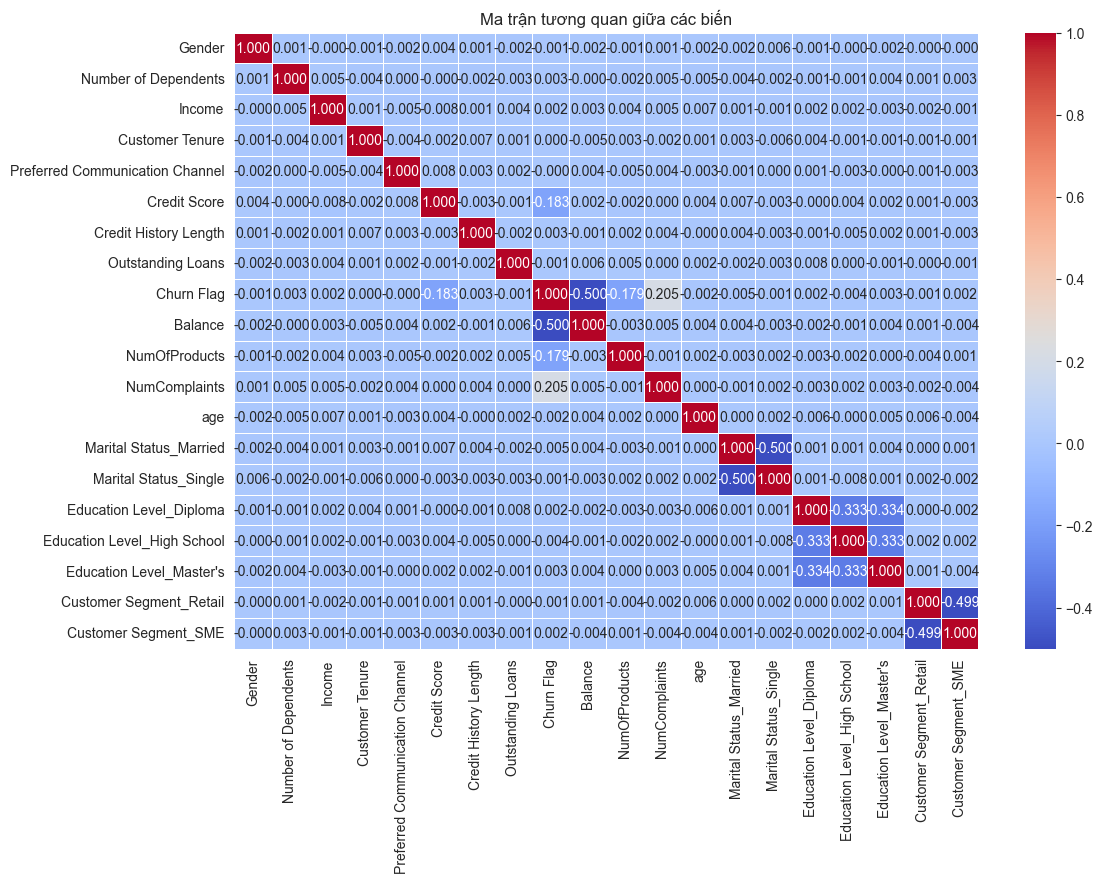

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính toán ma trận tương quan
correlation_matrix = filtered_data.corr()

# Tạo biểu đồ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', linewidths=0.5)

# Thiết lập tiêu đề cho biểu đồ
plt.title('Ma trận tương quan giữa các biến')
plt.show()

In [93]:
print(filtered_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Gender                           115640 non-null  int64  
 1   Number of Dependents             115640 non-null  int64  
 2   Income                           115640 non-null  float64
 3   Customer Tenure                  115640 non-null  int64  
 4   Preferred Communication Channel  115640 non-null  int64  
 5   Credit Score                     115640 non-null  int64  
 6   Credit History Length            115640 non-null  int64  
 7   Outstanding Loans                115640 non-null  float64
 8   Churn Flag                       115640 non-null  int64  
 9   Balance                          115640 non-null  float64
 10  NumOfProducts                    115640 non-null  int64  
 11  NumComplaints                    115640 non-null  int64  
 12  ag

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13120\2755508058.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_sorted.index, y=correlation_sorted.values, palette="viridis")


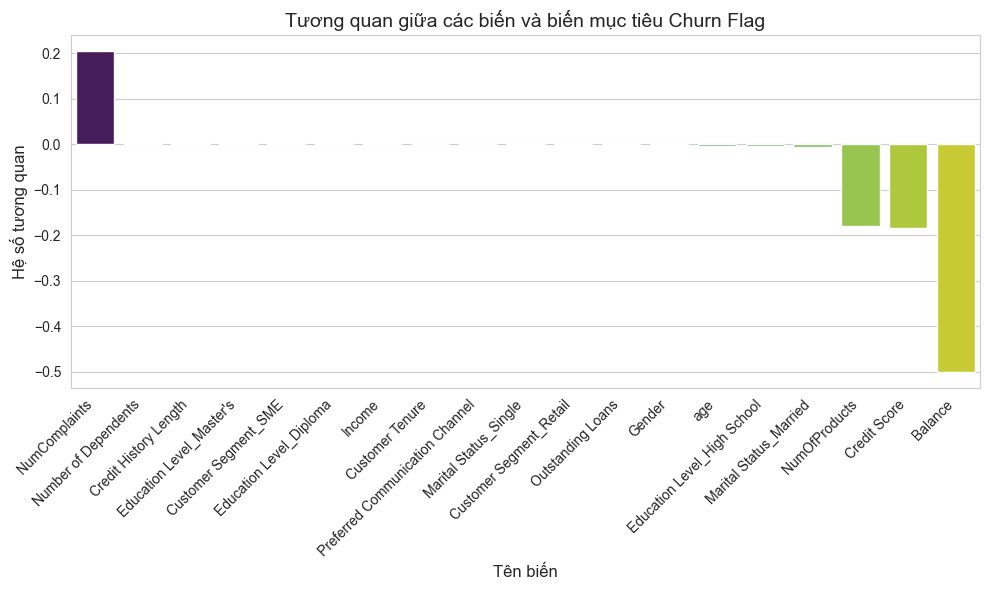

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính tương quan với biến mục tiêu
correlation_with_target = filtered_data.corr()['Churn Flag'].drop('Churn Flag')

# Sắp xếp tương quan theo giá trị
correlation_sorted = correlation_with_target.sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_sorted.index, y=correlation_sorted.values, palette="viridis")
plt.title("Tương quan giữa các biến và biến mục tiêu Churn Flag", fontsize=14)
plt.ylabel("Hệ số tương quan", fontsize=12)
plt.xlabel("Tên biến", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [95]:

# # Tính tương quan của từng biến với Churn Flag
# correlation_with_target = filtered_data.corr()['Churn Flag'].drop('Churn Flag')
# 
# # Đặt ngưỡng cho tương quan thấp
# threshold = 0.001
# 
# # Tìm các biến có tương quan thấp hơn ngưỡng
# low_corr_features = correlation_with_target[correlation_with_target.abs() < threshold].index.tolist()
# 
# print("Các biến có tương quan thấp với 'Churn Flag':")
# print(low_corr_features)
# 
# # Loại bỏ các cột có tương quan thấp với 'Churn Flag'
# filtered_test_data = filtered_data.drop(columns=low_corr_features)
# 
# print(f"Các cột bị loại bỏ: {low_corr_features}")
# print(f"Kích thước dữ liệu sau khi loại bỏ: {filtered_test_data.shape}")



In [96]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred, weights, alpha, reg_type="l2", class_weights=None):
    m = y.shape[0]
    
    # Mất mát với trọng số lớp
    loss_0 = -np.sum((y == 0) * np.log(1 - y_pred)) 
    loss_1 = -np.sum((y == 1) * np.log(y_pred)) 
    base_loss = (loss_0 + loss_1) / m
    
    # Thêm phần hiệu chỉnh
    if reg_type == "l2":
        reg_term = alpha * np.sum(weights ** 2) / (2 * m)  # L2 Regularization
    elif reg_type == "l1":
        reg_term = alpha * np.sum(np.abs(weights)) / m  # L1 Regularization
    else:
        reg_term = 0

    return base_loss + reg_term

# Huấn luyện Logistic Regression với hiệu chỉnh
class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, num_iterations=1000, alpha=0.01, reg_type="l2"):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.alpha = alpha  # Hệ số hiệu chỉnh
        self.reg_type = reg_type  # Loại hiệu chỉnh ("l1" hoặc "l2")
        self.weights = None
        self.bias = None
        self.loss_history = []  # Danh sách để lưu giá trị loss


    def fit(self, X, y):
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0
        m = X.shape[0]

        for i in range(self.num_iterations):
            # Tính giá trị dự đoán
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)

            # Tính độ lỗi
            loss = compute_loss(y, y_pred, self.weights, self.alpha, self.reg_type)
            self.loss_history.append(loss)  # Lưu giá trị loss vào danh sách

            # Gradient tính toán
            dw = (np.dot(X.T, (y_pred - y)) / m)
            db = np.sum(y_pred - y) / m

            # Thêm hiệu chỉnh vào gradient
            if self.reg_type == "l2":
                dw += (self.alpha * self.weights) / m
            elif self.reg_type == "l1":
                dw += (self.alpha * np.sign(self.weights)) / m

            # Cập nhật trọng số và bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if i % 100 == 0:
                print(f"Iteration {i}, Loss: {loss:.4f}")

    def predict(self, X):
        # Tính giá trị dự đoán
        linear_model = np.dot(X, self.weights) + self.bias  
        y_pred = sigmoid(linear_model)
        # Phân loại dựa trên ngưỡng 0.5
        return [1 if i > 0.5 else 0 for i in y_pred]

def standardize_data(X):
    # Chỉ chọn các cột kiểu số
    X_numeric = X.select_dtypes(include=[np.number])
    # Chuẩn hóa
    return (X_numeric - np.mean(X_numeric, axis=0)) / np.std(X_numeric, axis=0)

In [97]:

# Chuẩn bị dữ liệu
X = filtered_data.drop(['Churn Flag'], axis=1)
y = filtered_data['Churn Flag']


# Chia dữ liệu
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Sử dụng SMOTE để xử lý imbalance trên tập huấn luyện
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train_smote)
scaled_X_test = sc.transform(X_test)

In [98]:
# Chuyển scaled_X_train thành DataFrame
scaled_X_train_df = pd.DataFrame(scaled_X_train, columns=X_train_smote.columns)
scaled_X_test_df = pd.DataFrame(scaled_X_test, columns=X_test.columns)
# Hiển thị một số hàng đầu tiên của dữ liệu chuẩn hóa
print("5 Hàng đầu của tập dữ liệu huấn luyện sau khi chuẩn hóa:")
print(scaled_X_train_df.head().T)
print("\n5 Hàng đầu của tập dữ liệu kiểm tra sau khi chuẩn hóa:")
print(scaled_X_test_df.head())

5 Hàng đầu của tập dữ liệu huấn luyện sau khi chuẩn hóa:
                                        0         1         2         3  \
Gender                          -0.798680 -0.798680 -0.798680  1.252066   
Number of Dependents             1.684487 -1.466931  0.423920  1.684487   
Income                           1.660800 -1.425649 -0.003806 -0.123595   
Customer Tenure                 -1.411606  1.458927 -0.288354 -1.536412   
Preferred Communication Channel  1.242641 -0.804738 -0.804738  1.242641   
Credit Score                    -0.115680  1.836009  0.073411  1.734711   
Credit History Length           -0.928270  1.820681  0.071349  0.821062   
Outstanding Loans                1.137486 -0.693832  1.680107  1.293630   
Balance                          1.666259 -0.760472  1.333546  1.828667   
NumOfProducts                    1.812589  0.329749 -1.153090  1.071169   
NumComplaints                   -0.190332 -1.918278  0.155257 -0.881511   
age                             -1.076176  

Iteration 0, Loss: 0.6931
Iteration 100, Loss: 0.1925
Iteration 200, Loss: 0.1495
Iteration 300, Loss: 0.1298
Iteration 400, Loss: 0.1177
Iteration 500, Loss: 0.1091
Iteration 600, Loss: 0.1025
Iteration 700, Loss: 0.0973
Iteration 800, Loss: 0.0930
Iteration 900, Loss: 0.0893
Iteration 1000, Loss: 0.0861
Iteration 1100, Loss: 0.0833
Iteration 1200, Loss: 0.0809
Iteration 1300, Loss: 0.0787
Iteration 1400, Loss: 0.0767
Iteration 1500, Loss: 0.0748
Iteration 1600, Loss: 0.0732
Iteration 1700, Loss: 0.0716
Iteration 1800, Loss: 0.0702
Iteration 1900, Loss: 0.0689
Iteration 2000, Loss: 0.0677
Iteration 2100, Loss: 0.0665
Iteration 2200, Loss: 0.0655
Iteration 2300, Loss: 0.0644
Iteration 2400, Loss: 0.0635
Iteration 2500, Loss: 0.0626
Iteration 2600, Loss: 0.0617
Iteration 2700, Loss: 0.0609
Iteration 2800, Loss: 0.0601
Iteration 2900, Loss: 0.0594
Iteration 3000, Loss: 0.0587
Iteration 3100, Loss: 0.0580
Iteration 3200, Loss: 0.0574
Iteration 3300, Loss: 0.0567
Iteration 3400, Loss: 0.05

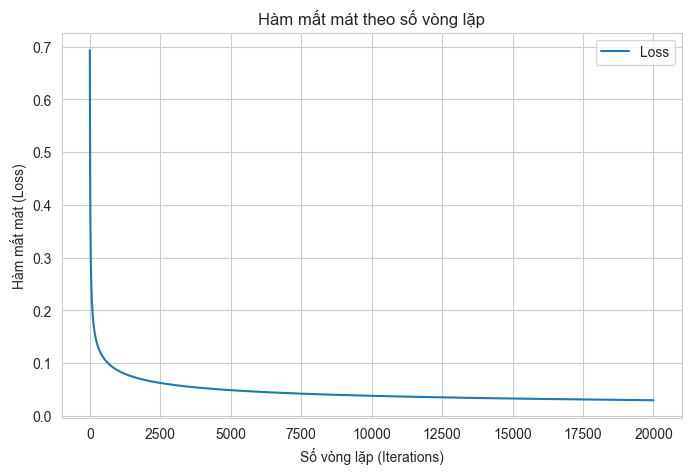

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     30419
           1       0.90      0.98      0.94      4273

    accuracy                           0.98     34692
   macro avg       0.95      0.98      0.96     34692
weighted avg       0.98      0.98      0.98     34692

Custom Logistic Regression - ROC-AUC: 0.9806


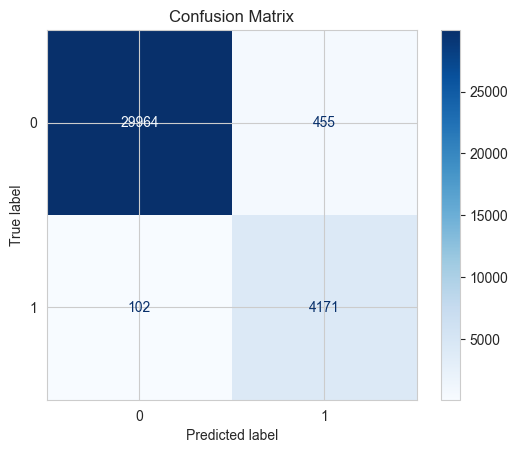

In [99]:

# Khởi tạo và huấn luyện mô hình
model = LogisticRegressionCustom(learning_rate=0.1, num_iterations=20000, alpha = 0.1, reg_type = "l1")
model.fit(scaled_X_train, y_train_smote)
# Dự đoán trên tập kiểm tra
y_pred = model.predict(scaled_X_test)
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Vẽ biểu đồ loss
plt.figure(figsize=(8, 5))
plt.plot(range(len(model.loss_history)), model.loss_history, label='Loss')
plt.xlabel('Số vòng lặp (Iterations)')
plt.ylabel('Hàm mất mát (Loss)')
plt.title('Hàm mất mát theo số vòng lặp')
plt.legend()
plt.grid(True)
plt.show()

# In ra classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Tính và in ra ROC-AUC
auc_score = roc_auc_score(y_test, y_pred)
print(f"Custom Logistic Regression - ROC-AUC: {auc_score:.4f}")

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')  # 'd' để hiển thị dưới dạng số nguyên

# Nếu muốn, bạn có thể thêm một số tùy chỉnh như tiêu đề
import matplotlib.pyplot as plt
plt.title("Confusion Matrix")
plt.show()




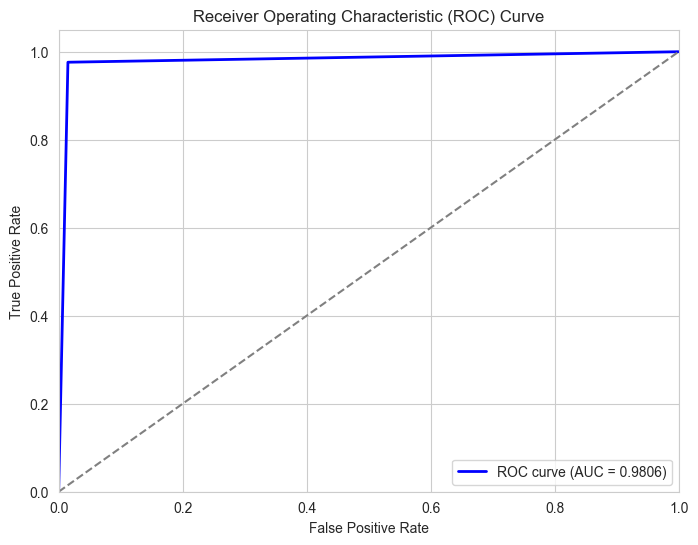

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Tính toán điểm FPR (False Positive Rate), TPR (True Positive Rate) và ngưỡng
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Tính toán giá trị AUC
roc_auc = auc(fpr, tpr)

# Vẽ biểu đồ AUC-ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Đường chéo ngẫu nhiên (random)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


{'C': 10}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30419
           1       0.97      1.00      0.98      4273

    accuracy                           1.00     34692
   macro avg       0.99      1.00      0.99     34692
weighted avg       1.00      1.00      1.00     34692

Custom Logistic Regression - ROC-AUC: 0.9959


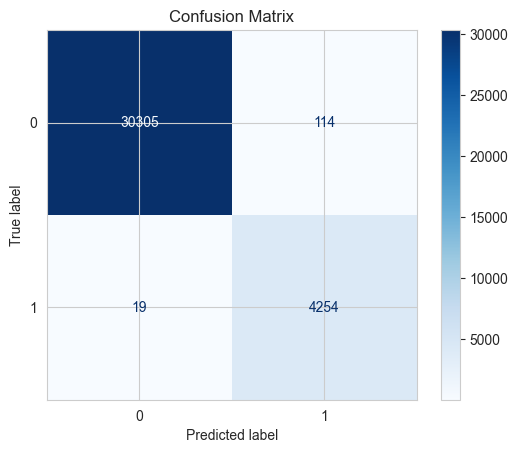

Confusion Matrix:
[[30305   114]
 [   19  4254]]


In [101]:
from sklearn.linear_model import LogisticRegression

# GridSearch với LogisticRegression từ sklearn
param_grid = {'C': [0.01, 0.1, 0.001, 10,100,10000]}  # C là nghịch đảo của alpha
grid = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), param_grid, cv=5, scoring='roc_auc')
grid.fit(scaled_X_train, y_train_smote)
print(grid.best_params_)
# # Dự đoán
# y_pred = model.predict(X_test)
y_pred = grid.predict(scaled_X_test)
# Đánh giá mô hình
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

print("Classification Report:")
print(classification_report(y_test, y_pred))

auc_score = roc_auc_score(y_test, y_pred)
print(f"Custom Logistic Regression - ROC-AUC: {auc_score:.4f}")
# Tính ma trận nhầm lẫn
# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')  # 'd' để hiển thị dưới dạng số nguyên

# Nếu muốn, bạn có thể thêm một số tùy chỉnh như tiêu đề
import matplotlib.pyplot as plt
plt.title("Confusion Matrix")
plt.show()

# In ma trận nhầm lẫn dưới dạng số
print("Confusion Matrix:")
print(cm)
